In [10]:
import os
import csv
from matplotlib import pyplot as plt
import pandas as pd
from vidstab.VidStab import VidStab

SyntaxError: invalid syntax (VidStab.py, line 263)

In [16]:
gyro_path = os.getcwd() + "/data/HET_0009.CSV"
data_path = os.getcwd() + "/data/saint-urbain/processed/data.hdf5"


In [9]:
gyro_df = pd.read_csv(gyro_path, sep=',', header=None)

In [10]:
cols = ["frm", "xAccel", "yAccel", "zAccel", "xGyro", "yGyro", "zGyro", "xMagnet", "yMagnet", "zMagnet"]

In [11]:
data = []
i = 0
for idx, row in gyro_df.iterrows():
    i += 1
    row_data = {}
    for idx2, element in row.iteritems():
        if "=" in str(element):
            k, v = element.split("=")
            if k in cols:
                row_data[k] = float(v)
    if len(row_data) > 1:
        data.append(row_data)
#     if i ==10:
#         break

In [14]:
gyro_df = pd.DataFrame(data, columns=cols)

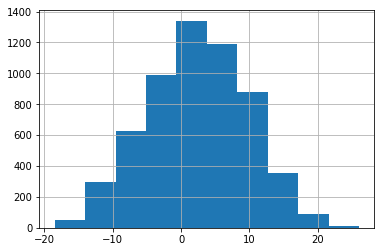

In [15]:
gyro_df[['xGyro', 'yGyro']].sum(axis=1).hist()

In [17]:
data_df = pd.read_hdf(data_path)

In [18]:
data_df.loc[0]

angle                                                  352.569
thumbnail    [[[134, 139, 160], [144, 151, 156], [120, 124,...
x                                                    0.0135071
y                                                     -1.15745
z                                                            0
Name: 0, dtype: object

In [3]:
import cv2
import os

image_folder = 'data/saint-urbain/raw/video/crops'
video_name = 'video.mov'

images = [img for img in os.listdir(image_folder) if img.endswith(".png") and img.startswith("camera_5")]
images.sort()
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()


In [11]:

stabilizer = VidStab()
stabilizer.stabilize(input_path='video.mov', output_path='stable_video.avi')


NameError: name 'VidStab' is not defined

In [29]:
os.getcwd()

'/Users/martinweiss/code/academic/hyrule-gym'

In [31]:
stabilizer.stabilize

NameError: name 'stabilizer' is not defined